In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('HOG_bb.csv')

# Dividir los datos en características (features) y etiquetas (labels)
X = df.drop("etiqueta", axis=1)  # Características
y = df["etiqueta"]  # Etiquetas

print("Características: ", X.shape)
print("Etiqueta: ", y.shape)

Características:  (3000, 528)
Etiqueta:  (3000,)


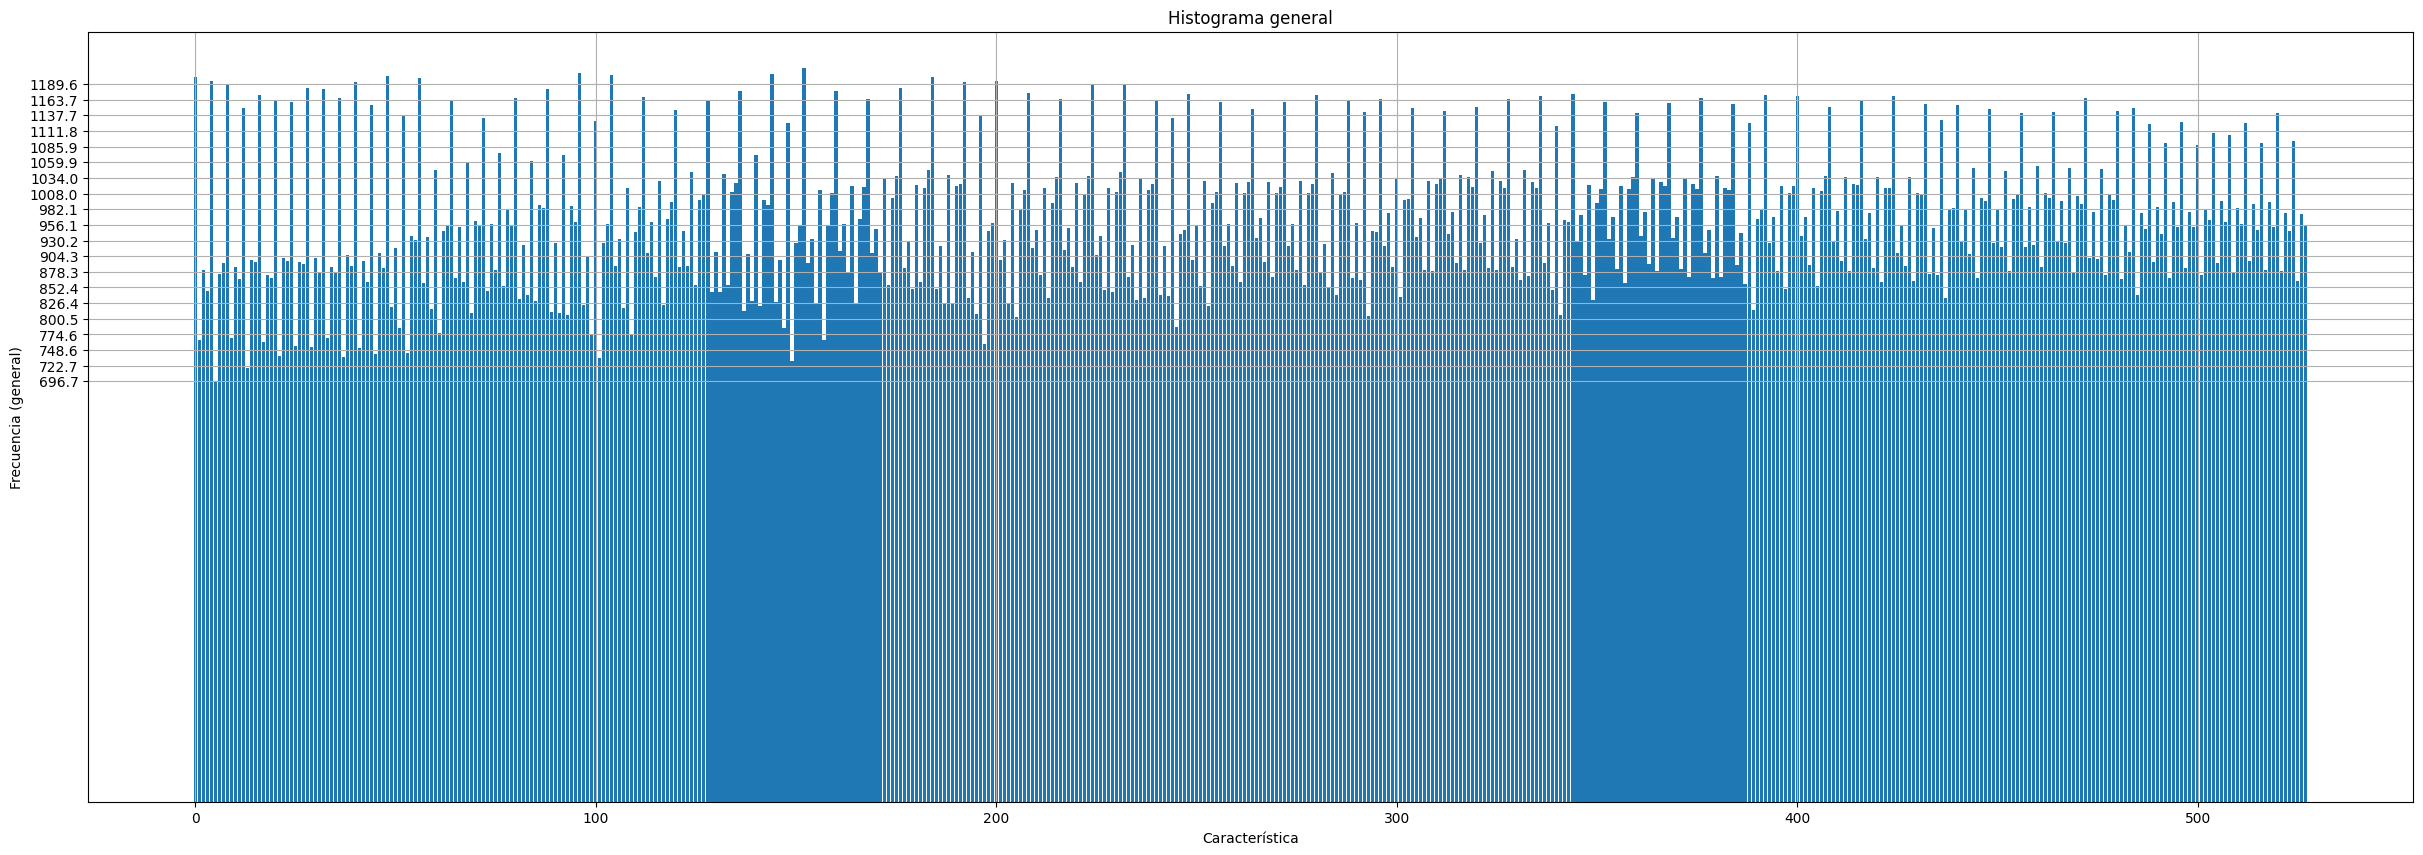

Los tres valores más bajos del histograma general son:
HOG_5      696.742071
HOG_13     718.588155
HOG_149    730.490945
dtype: float64
Los tres valores más altos del histograma general son:
HOG_152    1215.554283
HOG_96     1207.984983
HOG_144    1206.317775
dtype: float64


In [5]:
# Crea el histograma combinando las características
histograma_general = np.sum(X, axis=0)

# Visualiza el histograma
plt.figure(figsize=(30, 10))
plt.bar(range(len(histograma_general)), histograma_general)
plt.title('Histograma general')
plt.xlabel('Característica')

# Define los valores para el eje y
minimo = np.min(histograma_general)
maximo = np.max(histograma_general)
paso = (maximo - minimo) / 20  # Define el paso para tener 20 valores en el eje y
valores_y = np.arange(minimo, maximo, paso)

plt.yticks(valores_y)  # Establece los valores para el eje y
plt.ylabel('Frecuencia (general)')
plt.grid(True)
plt.show()

# Ordena el DataFrame por la columna 'etiqueta' y selecciona los primeros tres registros
tres_mas_bajos = histograma_general.sort_values().head(3)
print('Los tres valores más bajos del histograma general son:')
print(tres_mas_bajos)

# Ordena el DataFrame por la columna 'etiqueta' en orden descendente y selecciona los primeros tres registros
tres_mas_altos = histograma_general.sort_values(ascending=False).head(3)
print('Los tres valores más altos del histograma general son:')
print(tres_mas_altos)

Número de clases:  3
Los tres valores más bajos para la clase 1 son:
HOG_5     213.776935
HOG_13    219.836095
HOG_21    222.351176
dtype: float64
Los tres valores más altos para la clase 1 son:
HOG_152    437.486431
HOG_104    435.021733
HOG_144    428.905476
dtype: float64
------------------------------------------------
Los tres valores más bajos para la clase 2 son:
HOG_99     216.683373
HOG_147    218.263259
HOG_51     220.183665
dtype: float64
Los tres valores más altos para la clase 2 son:
HOG_48     428.589319
HOG_296    428.115971
HOG_248    427.927787
dtype: float64
------------------------------------------------
Los tres valores más bajos para la clase 3 son:
HOG_1     224.694035
HOG_25    225.099901
HOG_17    226.247209
dtype: float64
Los tres valores más altos para la clase 3 son:
HOG_4     435.743570
HOG_36    428.313234
HOG_44    421.553472
dtype: float64
------------------------------------------------


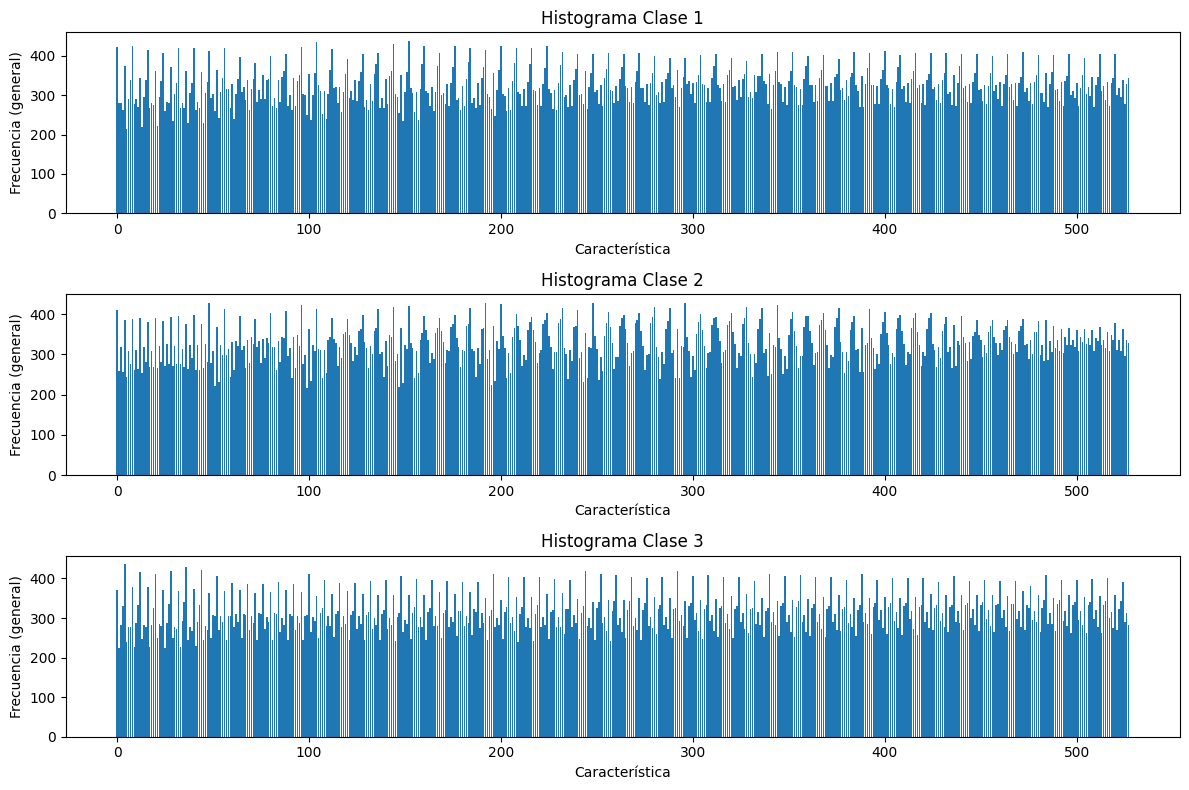

In [6]:
# Número de clases
etiquetas_clases = np.unique(y)
print("Número de clases: ", len(etiquetas_clases))

# Inicializa una lista para almacenar histogramas por clase
histograma_clase = []

# Itera sobre cada clase y calcula el histograma correspondiente
for etiqueta_clase in etiquetas_clases:
    # Filtra las características por clase
    caracteristicas_clase = X[y == etiqueta_clase]

    # Crea el histograma combinando las características para esta clase
    histograma_general = np.sum(caracteristicas_clase, axis=0)
    
    # Agrega el histograma de esta clase a la lista
    histograma_clase.append(histograma_general)

# Visualiza los histogramas para cada clase
plt.figure(figsize=(12, 8))
for i, (etiqueta_clase, histogram) in enumerate(zip(etiquetas_clases, histograma_clase)):
    plt.subplot(len(etiquetas_clases), 1, i+1)
    plt.bar(range(len(histogram)), histogram)
    plt.title('Histograma Clase {}'.format(etiqueta_clase))
    plt.xlabel('Característica')
    plt.ylabel('Frecuencia (general)')
    
        # Ordena el DataFrame por la columna 'etiqueta' y selecciona los primeros tres registros
    tres_mas_bajos = histogram.sort_values().head(3)
    print('Los tres valores más bajos para la clase {} son:'.format(etiqueta_clase))
    print(tres_mas_bajos)

    # Ordena el DataFrame por la columna 'etiqueta' en orden descendente y selecciona los primeros tres registros
    tres_mas_altos = histogram.sort_values(ascending=False).head(3)
    print('Los tres valores más altos para la clase {} son:'.format(etiqueta_clase))
    print(tres_mas_altos)
    print("------------------------------------------------")

plt.tight_layout()
plt.show()